In [ ]:
#--------------------------
MOUNT_GOOGLE_DRIVE = True
#--------------------------

if(MOUNT_GOOGLE_DRIVE==True):
  from google.colab import drive
  drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# imports

from zipfile import ZipFile
import numpy as np
import h5py
import math
import pickle

import cv2
import random
from matplotlib import pyplot as plt

In [ ]:
%cd /content/gdrive/Shareddrives/Computer_Vision

/content/gdrive/Shareddrives/Computer_Vision


In [ ]:
# decompressing the data

with ZipFile('app_data_reduced.zip','r') as zip:
   zip.extractall()
   print('Data decompressed successfully')

Data decompressed successfully


# Data Analysis

### Separating the data between the 4 age groups

In [ ]:
# Define the age ranges for the four groups
age_bins = [0, 20, 40, 60]

# Use numpy's digitize function to assign each sample to a group
group_indices = np.digitize(Y_train * 100, age_bins)

# Create separate lists or arrays for each group
tr_group_1 = Y_train[group_indices == 1]
tr_group_2 = Y_train[group_indices == 2]
tr_group_3 = Y_train[group_indices == 3]
tr_group_4 = Y_train[group_indices == 4]

# Now you can analyze or process each group separately
# For example, print the sizes of each group
print('--- TRAIN SET ---')
print(f"Group 1 (0-20): {len(tr_group_1)} samples")
print(f"Group 2 (20-40): {len(tr_group_2)} samples")
print(f"Group 3 (40-60): {len(tr_group_3)} samples")
print(f"Group 4 (60-100): {len(tr_group_4)} samples")

# Use numpy's digitize function to assign each sample to a group
group_indices = np.digitize(Y_valid * 100, age_bins)

# Create separate lists or arrays for each group
val_group_1 = Y_valid[group_indices == 1]
val_group_2 = Y_valid[group_indices == 2]
val_group_3 = Y_valid[group_indices == 3]
val_group_4 = Y_valid[group_indices == 4]

# Now you can analyze or process each group separately
# For example, print the sizes of each group
print("---VALIDATION SET ----")
print(f"Group 1 (0-20): {len(val_group_1)} samples")
print(f"Group 2 (20-40): {len(val_group_2)} samples")
print(f"Group 3 (40-60): {len(val_group_3)} samples")
print(f"Group 4 (60-100): {len(val_group_4)} samples")

--- TRAIN SET ---
Group 1 (0-20): 534 samples
Group 2 (20-40): 1683 samples
Group 3 (40-60): 525 samples
Group 4 (60-100): 103 samples
---VALIDATION SET ----
Group 1 (0-20): 205 samples
Group 2 (20-40): 590 samples
Group 3 (40-60): 197 samples
Group 4 (60-100): 45 samples


(0.0, 100.0)

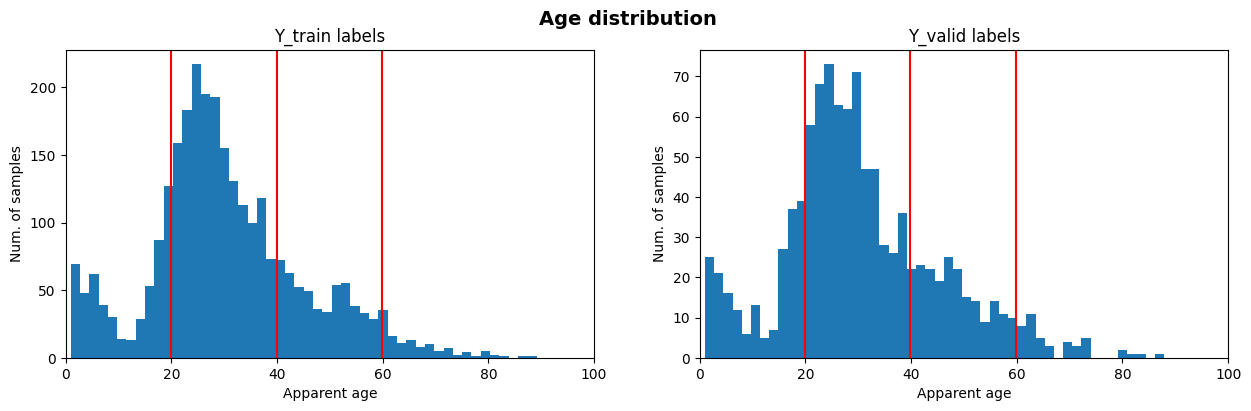

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Age distribution', fontsize=14, fontweight='bold')

# labels are multiplied by 100 to show the original values
ax1.hist(Y_train*100, bins = 50)
ax1.axvline(x=tr_group_1.max()*100, color='r', label='axvline - full height')
ax1.axvline(x=tr_group_2.max()*100, color='r', label='axvline - full height')
ax1.axvline(x=tr_group_3.max()*100, color='r', label='axvline - full height')
#ax1.axvline(x=tr_group_4.mean()*100, color='r', label='axvline - full height')

ax1.set_title('Y_train labels')
ax1.set(xlabel='Apparent age', ylabel='Num. of samples')
ax1.set_xlim([0, 100])

ax2.hist(Y_valid*100, bins = 50)
ax2.axvline(x=val_group_1.max()*100, color='r', label='axvline - full height')
ax2.axvline(x=val_group_2.max()*100, color='r', label='axvline - full height')
ax2.axvline(x=val_group_3.max()*100, color='r', label='axvline - full height')
#ax2.axvline(x=val_group_4.mean()*100, color='r', label='axvline - full height')

ax2.set_title('Y_valid labels')
ax2.set(xlabel='Apparent age', ylabel='Num. of samples')
ax2.set_xlim([0, 100])

In [ ]:
# Define age bins
age_bins = [0, 20, 40, 60]

# Use numpy's digitize function to assign each sample to a group
group_indices = np.digitize(Y_train * 100, age_bins)

# Create separate lists or arrays for each group
tr_group_1_indices = np.where(group_indices == 1)[0]
tr_group_2_indices = np.where(group_indices == 2)[0]
tr_group_3_indices = np.where(group_indices == 3)[0]
tr_group_4_indices = np.where(group_indices == 4)[0]

# Divide the datasets based on the group indices
tr_group_1_X = X_train[tr_group_1_indices]
tr_group_2_X = X_train[tr_group_2_indices]
tr_group_3_X = X_train[tr_group_3_indices]
tr_group_4_X = X_train[tr_group_4_indices]

tr_group_1_Y = Y_train[tr_group_1_indices]
tr_group_2_Y = Y_train[tr_group_2_indices]
tr_group_3_Y = Y_train[tr_group_3_indices]
tr_group_4_Y = Y_train[tr_group_4_indices]

tr_group_1_M = M_train[tr_group_1_indices]
tr_group_2_M = M_train[tr_group_2_indices]
tr_group_3_M = M_train[tr_group_3_indices]
tr_group_4_M = M_train[tr_group_4_indices]

In [ ]:
# Define age bins
age_bins = [0, 20, 40, 60]

# Use numpy's digitize function to assign each sample to a group
group_indices = np.digitize(Y_valid * 100, age_bins)

# Create separate lists or arrays for each group
valid_group_1_indices = np.where(group_indices == 1)[0]
valid_group_2_indices = np.where(group_indices == 2)[0]
valid_group_3_indices = np.where(group_indices == 3)[0]
valid_group_4_indices = np.where(group_indices == 4)[0]

# Divide the datasets based on the group indices
valid_group_1_X = X_valid[valid_group_1_indices]
valid_group_2_X = X_valid[valid_group_2_indices]
valid_group_3_X = X_valid[valid_group_3_indices]
valid_group_4_X = X_valid[valid_group_4_indices]

valid_group_1_Y = Y_valid[valid_group_1_indices]
valid_group_2_Y = Y_valid[valid_group_2_indices]
valid_group_3_Y = Y_valid[valid_group_3_indices]
valid_group_4_Y = Y_valid[valid_group_4_indices]

valid_group_1_M = M_valid[valid_group_1_indices]
valid_group_2_M = M_valid[valid_group_2_indices]
valid_group_3_M = M_valid[valid_group_3_indices]
valid_group_4_M = M_valid[valid_group_4_indices]


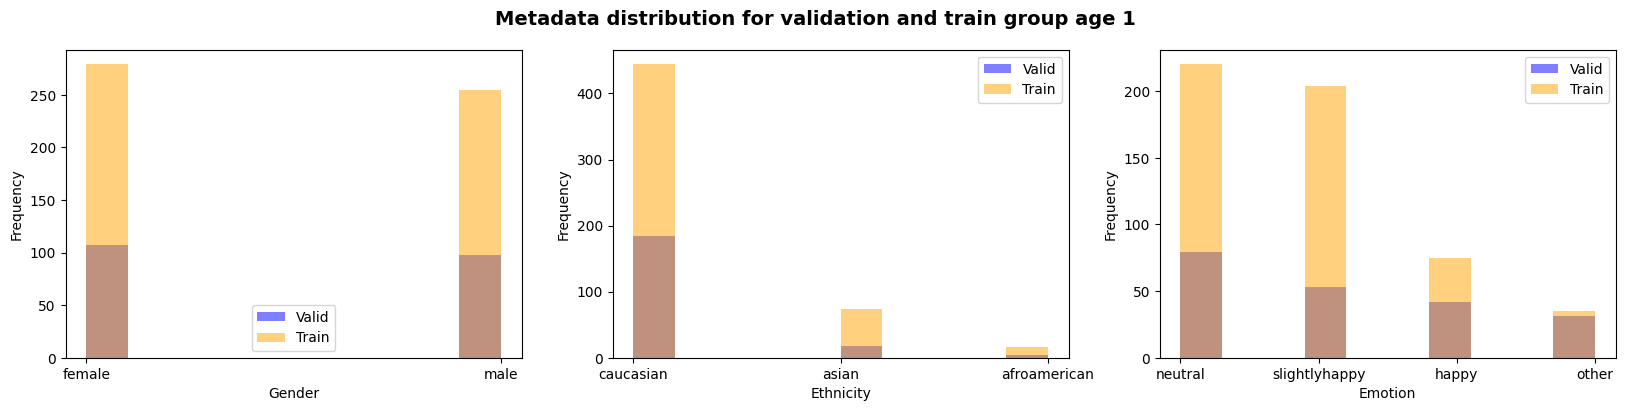

In [ ]:
# Extract data for valid_group_1
valid_gender = []
valid_ethnicity = []
valid_emotion = []
for sample in valid_group_1_M:
    valid_gender.append(sample[0])
    valid_ethnicity.append(sample[1])
    valid_emotion.append(sample[2])

# Extract data for train_group_1
train_gender = []
train_ethnicity = []
train_emotion = []
for sample in tr_group_1_M:
    train_gender.append(sample[0])
    train_ethnicity.append(sample[1])
    train_emotion.append(sample[2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Metadata distribution for validation and train group age 1', fontsize=14, fontweight='bold')

# Plot histograms for valid data
ax1.hist(valid_gender, color='blue', alpha=0.5, label='Valid')
ax2.hist(valid_ethnicity, color='blue', alpha=0.5, label='Valid')
ax3.hist(valid_emotion, color='blue', alpha=0.5, label='Valid')

# Plot histograms for train data
ax1.hist(train_gender, color='orange', alpha=0.5, label='Train')
ax2.hist(train_ethnicity, color='orange', alpha=0.5, label='Train')
ax3.hist(train_emotion, color='orange', alpha=0.5, label='Train')

# Set labels and legend
ax1.set_xlabel('Gender')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Ethnicity')
ax2.set_ylabel('Frequency')
ax3.set_xlabel('Emotion')
ax3.set_ylabel('Frequency')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

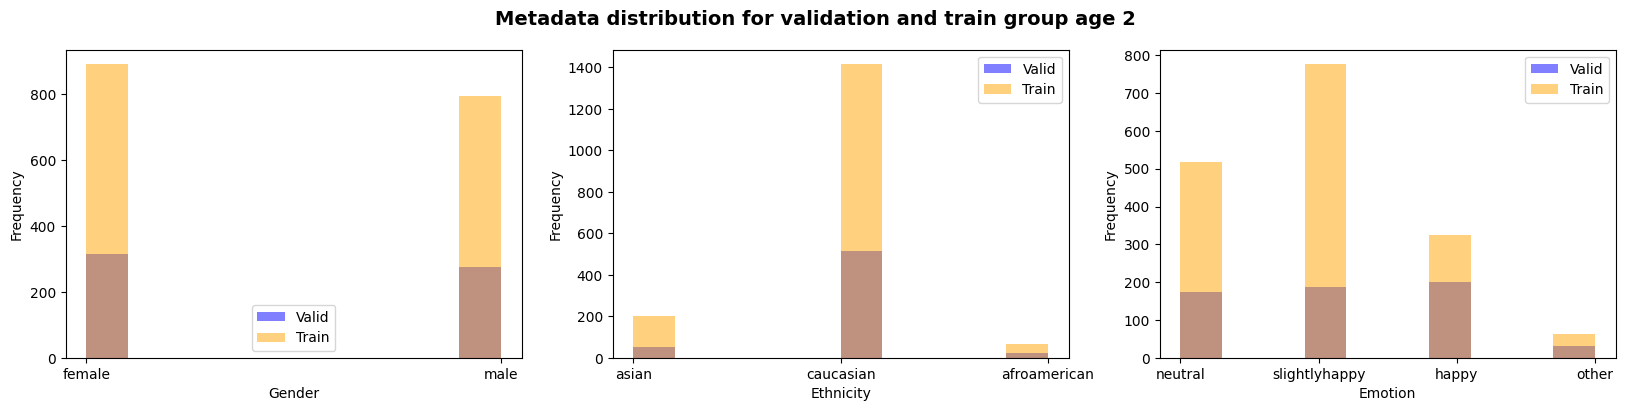

In [ ]:
# Extract data for valid_group_2
valid_gender = []
valid_ethnicity = []
valid_emotion = []
for sample in valid_group_2_M:
    valid_gender.append(sample[0])
    valid_ethnicity.append(sample[1])
    valid_emotion.append(sample[2])

# Extract data for train_group_2
train_gender = []
train_ethnicity = []
train_emotion = []
for sample in tr_group_2_M:
    train_gender.append(sample[0])
    train_ethnicity.append(sample[1])
    train_emotion.append(sample[2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Metadata distribution for validation and train group age 2', fontsize=14, fontweight='bold')

# Plot histograms for valid data
ax1.hist(valid_gender, color='blue', alpha=0.5, label='Valid')
ax2.hist(valid_ethnicity, color='blue', alpha=0.5, label='Valid')
ax3.hist(valid_emotion, color='blue', alpha=0.5, label='Valid')

# Plot histograms for train data
ax1.hist(train_gender, color='orange', alpha=0.5, label='Train')
ax2.hist(train_ethnicity, color='orange', alpha=0.5, label='Train')
ax3.hist(train_emotion, color='orange', alpha=0.5, label='Train')

# Set labels and legend
ax1.set_xlabel('Gender')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Ethnicity')
ax2.set_ylabel('Frequency')
ax3.set_xlabel('Emotion')
ax3.set_ylabel('Frequency')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

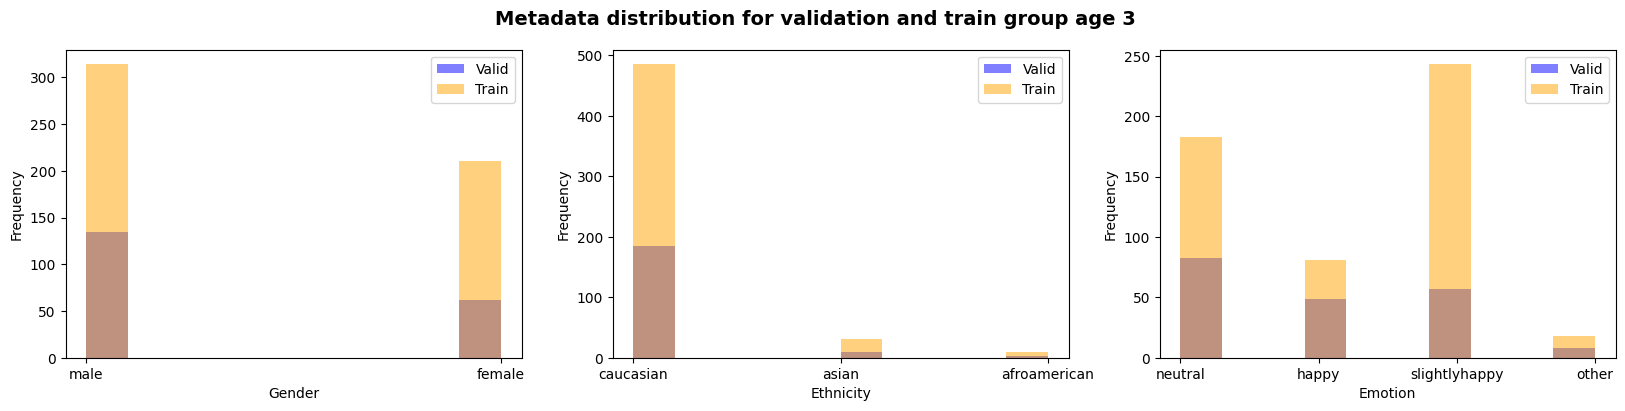

In [ ]:
# Extract data for valid_group_3
valid_gender = []
valid_ethnicity = []
valid_emotion = []
for sample in valid_group_3_M:
    valid_gender.append(sample[0])
    valid_ethnicity.append(sample[1])
    valid_emotion.append(sample[2])

# Extract data for train_group_3
train_gender = []
train_ethnicity = []
train_emotion = []
for sample in tr_group_3_M:
    train_gender.append(sample[0])
    train_ethnicity.append(sample[1])
    train_emotion.append(sample[2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Metadata distribution for validation and train group age 3', fontsize=14, fontweight='bold')

# Plot histograms for valid data
ax1.hist(valid_gender, color='blue', alpha=0.5, label='Valid')
ax2.hist(valid_ethnicity, color='blue', alpha=0.5, label='Valid')
ax3.hist(valid_emotion, color='blue', alpha=0.5, label='Valid')

# Plot histograms for train data
ax1.hist(train_gender, color='orange', alpha=0.5, label='Train')
ax2.hist(train_ethnicity, color='orange', alpha=0.5, label='Train')
ax3.hist(train_emotion, color='orange', alpha=0.5, label='Train')

# Set labels and legend
ax1.set_xlabel('Gender')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Ethnicity')
ax2.set_ylabel('Frequency')
ax3.set_xlabel('Emotion')
ax3.set_ylabel('Frequency')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

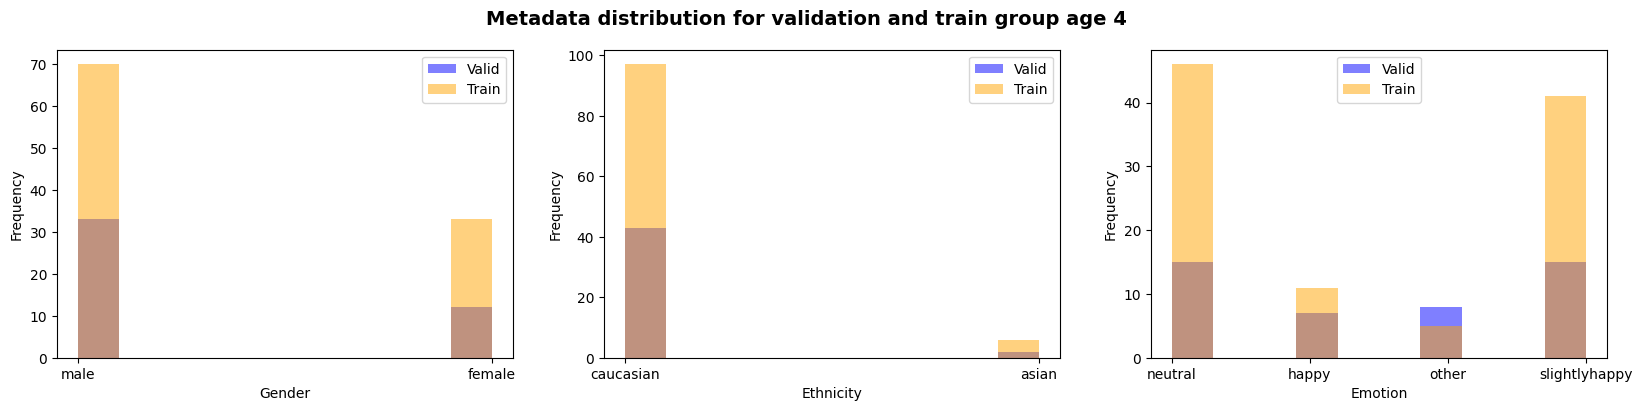

In [ ]:
# Extract data for valid_group_4
valid_gender = []
valid_ethnicity = []
valid_emotion = []
for sample in valid_group_4_M:
    valid_gender.append(sample[0])
    valid_ethnicity.append(sample[1])
    valid_emotion.append(sample[2])

# Extract data for train_group_4
train_gender = []
train_ethnicity = []
train_emotion = []
for sample in tr_group_4_M:
    train_gender.append(sample[0])
    train_ethnicity.append(sample[1])
    train_emotion.append(sample[2])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Metadata distribution for validation and train group age 4', fontsize=14, fontweight='bold')

# Plot histograms for valid data
ax1.hist(valid_gender, color='blue', alpha=0.5, label='Valid')
ax2.hist(valid_ethnicity, color='blue', alpha=0.5, label='Valid')
ax3.hist(valid_emotion, color='blue', alpha=0.5, label='Valid')

# Plot histograms for train data
ax1.hist(train_gender, color='orange', alpha=0.5, label='Train')
ax2.hist(train_ethnicity, color='orange', alpha=0.5, label='Train')
ax3.hist(train_emotion, color='orange', alpha=0.5, label='Train')

# Set labels and legend
ax1.set_xlabel('Gender')
ax1.set_ylabel('Frequency')
ax2.set_xlabel('Ethnicity')
ax2.set_ylabel('Frequency')
ax3.set_xlabel('Emotion')
ax3.set_ylabel('Frequency')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

# Bias functions

In [ ]:
# downloading our "bias library", which contains the functions used to evaluate
# the different bias scores
#!wget http://data.chalearnlap.cvc.uab.cat/Colab_MFPDS/bias_functions.py

# Experiments

# Our custom loss

In [ ]:
weights = {}
total = len(Y_train)
def get_weight(n, x):
  return (5 + total)/(5 + n * x)

In [ ]:
n = 2

male = (M_train[:,0] == 'male').sum()
female = (M_train[:,0] == 'female').sum()

weights['male'] = get_weight(n, male)
weights['female'] = get_weight(n, female)

print(f"\tSupport\tWeight")
print(f"male\t{male}\t{get_weight(n, male)}")
print(f"female\t{female}\t{get_weight(n, female)}")

	Support	Weight
male	1325	1.0444444444444445
female	1443	0.9591836734693877


In [ ]:
n = 3

cauc = (M_train[:,1] == 'caucasian').sum()
afro = (M_train[:,1] == 'afroamerican').sum()
asia = (M_train[:,1] == 'asian').sum()

weights['caucasian'] = get_weight(n, cauc)
weights['afroamerican'] = get_weight(n, afro)
weights['asian'] = get_weight(n, asia)

print(f"\t\tSupport\tWeight")
print(f"caucasian\t{cauc}\t{get_weight(n, cauc)}")
print(f"afroamerican\t{afro}\t{get_weight(n, afro)}")
print(f"asian\t\t{asia}\t{get_weight(n, asia)}")

		Support	Weight
caucasian	1080	0.8545454545454545
afroamerican	738	1.2496620099143758
asian		950	0.9712784588441331


In [ ]:
n = 4

happ = (M_train[:,2] == 'happy').sum()
othe = (M_train[:,2] == 'other').sum()
neut = (M_train[:,2] == 'neutral').sum()
slig = (M_train[:,2] == 'slightlyhappy').sum()

weights['happy'] = get_weight(n, happ)
weights['other'] = get_weight(n, othe)
weights['neutral'] = get_weight(n, neut)
weights['slightlyhappy'] = get_weight(n, slig)


print(f"\t\tSupport\tWeight")
print(f"happy\t\t{happ}\t{get_weight(n, happ)}")
print(f"other\t\t{othe}\t{get_weight(n, othe)}")
print(f"neutral\t\t{neut}\t{get_weight(n, neut)}")
print(f"slightlyhappy\t{slig}\t{get_weight(n, slig)}")

		Support	Weight
happy		481	1.4375324002073613
other		171	4.0246734397677795
neutral		975	0.7101152368758002
slightlyhappy	1141	0.6069161742175531


In [ ]:
n = 100

Y_round = np.round(Y_train*100)

print(f"\t\tSupport\tWeight")
for i in range(0, 101):
  age = (Y_round==i).sum()
  weights[i] = get_weight(n, age)
  print(f"{i}\t{age}\t{get_weight(n, age)}")

		Support	Weight
0	0	554.6
1	37	0.7484480431848853
2	25	1.1069860279441117
3	16	1.7277258566978193
4	37	0.7484480431848853
5	28	0.9885918003565063
6	98	0.2828148903620602
7	48	0.5771071800208116
8	42	0.6594530321046373
9	44	0.6295119182746879
10	52	0.5327569644572526
11	39	0.7101152368758002
12	16	1.7277258566978193
13	22	1.2575963718820862
14	16	1.7277258566978193
15	36	0.7692094313453537
16	22	1.2575963718820862
17	51	0.5431929480901078
18	39	0.7101152368758002
19	39	0.7101152368758002
20	67	0.4135719612229679
21	60	0.461781848459617
22	71	0.39028852920478535
23	98	0.2828148903620602
24	116	0.23894872899612235
25	85	0.3260435038212816
26	85	0.3260435038212816
27	89	0.31139809096013477
28	110	0.251976374375284
29	67	0.4135719612229679
30	77	0.35989617131732643
31	73	0.37960301163586585
32	42	0.6594530321046373
33	54	0.5130434782608696
34	33	0.8390317700453858
35	25	1.1069860279441117
36	43	0.6441347270615563
37	40	0.6923845193508115
38	26	1.0644913627639156
39	17	1.626392961876833
40	

In [ ]:
# Example

idx = 123
print(Y_train[idx]*100)
print(M_train[idx])
weight = weights[Y_round[idx]] * weights[M_train[idx][0]] * weights[M_train[idx][1]] * weights[M_train[idx][2]]
weight

22.8208955223881
['female' 'caucasian' 'slightlyhappy']


0.14069152251431868

In [ ]:
sample_weights = np.array([weights[Y_round[idx]] * weights[M_train[idx][0]] * weights[M_train[idx][1]] * weights[M_train[idx][2]]
                          for idx in range(len(Y_train))])

In [ ]:
print(sample_weights)

[0.15491077 0.47436321 0.37287058 ... 0.18977602 1.61353886 1.61353886]


In [ ]:
males = 0
females = 0
for i in range(len(M_train)):
  if M_train[i][0] == 'male':
    males += sample_weights[i]
  elif M_train[i][0] == 'female':
    females += sample_weights[i]

print(males)
print(females)

1105.0350604976024
964.8846998808299


## Train

In [ ]:
import pickle

#--------------------------
LOAD_BEST_MODEL_ST2_WEIGHTED_LOSS = False
NUM_EPOCHS = 30
#--------------------------
RESUME_TRAINING = False
RESUME_FROM_EPOCH = 9
#--------------------------

if(LOAD_BEST_MODEL_ST2_WEIGHTED_LOSS==True):
  # downloading the trained model
  !wget https://data.chalearnlap.cvc.uab.cat/Colab_MFPDS/2024/best_model_st2_weighted.zip
  # decompressing the data
  with ZipFile('best_model_st2_weighted.zip','r') as zip:
    zip.extractall()
    print('Model decompressed successfully')
  # removing the .zip file after extraction  to clean space
  !rm best_model_st2_weighted.zip

else:
  # loading the saved model (best model learned at stage 1)
  if(RESUME_TRAINING == False):
    model = tf.keras.models.load_model('/content/gdrive/Shareddrives/Computer_Vision/best_model.h5') # load model from stage 1
  else:
    # resume training (stage 2)
    model = tf.keras.models.load_model('/content/gdrive/Shareddrives/Computer_Vision/best_model.h5')

  # setting all layers to traineble
  model.trainable = True

  #=================================================
  # training all layers (2nd stage), given the model saved on stage 1
  model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError(),metrics=['mae'])
  #=================================================

  # defining the early stop criteria
  es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
  mc = tf.keras.callbacks.ModelCheckpoint('/content/gdrive/Shareddrives/Computer_Vision/temp/best_model_loss.h5', monitor='val_loss', mode='min', save_best_only=True)

  if(RESUME_TRAINING == False):
    history = model.fit(X_train, Y_train, sample_weight=sample_weights, validation_data=(X_valid, Y_valid), batch_size=16, epochs=NUM_EPOCHS, initial_epoch=0, shuffle=True, verbose=1, callbacks=[es,mc])
    # saving training history
    with open('/content/gdrive/Shareddrives/Computer_Vision/temp/train_history_loss.pkl', 'wb') as handle:
      pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)
  else:
    history = model.fit(X_train, Y_train, sample_weight=sample_weights, validation_data=(X_valid, Y_valid), batch_size=16, epochs=NUM_EPOCHS, initial_epoch=RESUME_FROM_EPOCH, shuffle=True, verbose=1, callbacks=[es,mc])
    # in this code, the training history is not saved if you resume training


Epoch 1/30
178/178 [==============================] - ETA: 0s - loss: 0.1822 - mae: 0.0554

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


178/178 [==============================] - 78s 259ms/step - loss: 0.1822 - mae: 0.0554 - val_loss: 0.1855 - val_mae: 0.0666
Epoch 2/30
178/178 [==============================] - 38s 213ms/step - loss: 0.1850 - mae: 0.0534 - val_loss: 0.1845 - val_mae: 0.0647
Epoch 3/30
178/178 [==============================] - 39s 216ms/step - loss: 0.1820 - mae: 0.0521 - val_loss: 0.1834 - val_mae: 0.0611
Epoch 4/30
178/178 [==============================] - 37s 209ms/step - loss: 0.1793 - mae: 0.0493 - val_loss: 0.1827 - val_mae: 0.0599
Epoch 5/30
178/178 [==============================] - 45s 254ms/step - loss: 0.1798 - mae: 0.0484 - val_loss: 0.1821 - val_mae: 0.0584
Epoch 6/30
178/178 [==============================] - 39s 221ms/step - loss: 0.1786 - mae: 0.0480 - val_loss: 0.1813 - val_mae: 0.0579
Epoch 7/30
178/178 [==============================] - 38s 216ms/step - loss: 0.1770 - mae: 0.0463 - val_loss: 0.1807 - val_mae: 0.0570
Epoch 8/30
178/178 [==============================] - 41s 231ms/st

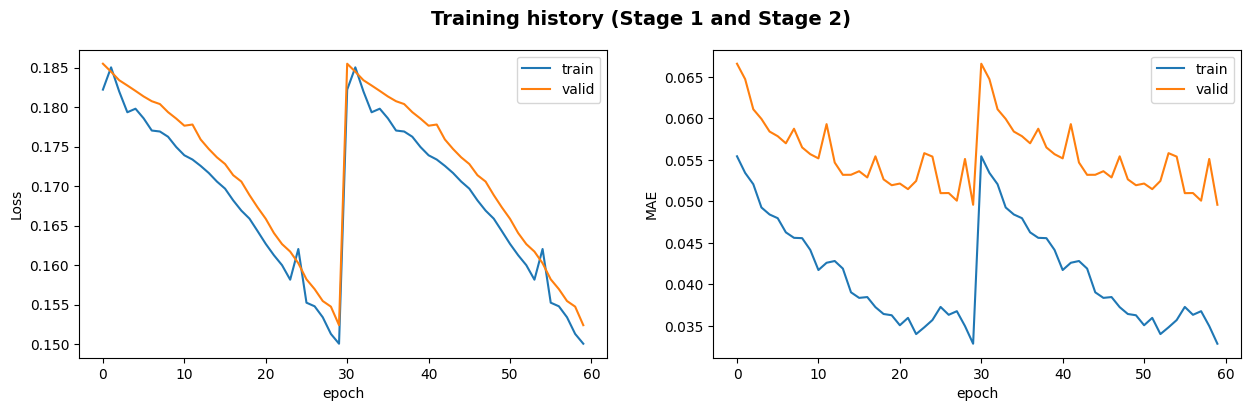

In [ ]:
from matplotlib import pyplot as plt

if(RESUME_TRAINING == False):
  if(LOAD_BEST_MODEL_ST2_WEIGHTED_LOSS==True):
    train_hist_2nd = pickle.load(open("train_history_2nd_stage_weighted.pkl","rb"))
  else:
    train_hist_2nd = pickle.load(open("/content/gdrive/Shareddrives/Computer_Vision/temp/train_history_loss.pkl","rb"))
  train_hist = pickle.load(open("/content/gdrive/Shareddrives/Computer_Vision/temp/train_history_loss.pkl","rb"))

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
  fig.suptitle('Training history (Stage 1 and Stage 2)', fontsize=14, fontweight='bold')

  ax1.plot(train_hist['loss']+train_hist_2nd['loss'])
  ax1.plot(train_hist['val_loss']+train_hist_2nd['val_loss'])
  ax1.set(xlabel='epoch', ylabel='Loss')
  ax1.legend(['train', 'valid'], loc='upper right')

  ax2.plot(train_hist['mae']+train_hist_2nd['mae'])
  ax2.plot(train_hist['val_mae']+train_hist_2nd['val_mae'])
  ax2.set(xlabel='epoch', ylabel='MAE')
  ax2.legend(['train', 'valid'], loc='upper right')

In [ ]:
del X_train, Y_train, M_train

In [ ]:
predictions_st2_weighted = model.predict(X_valid, batch_size=32, verbose=1)*100

33/33 [==============================] - 5s 71ms/step


In [ ]:
# evaluating on validation data
error = []
for i in range(0,len(Y_valid)):
  error.append(abs(np.subtract(predictions_st2_weighted[i][0],Y_valid[i]*100)))

print('MAE (validation set - with custom loss) = %.8f' %(np.mean(error)))

MAE (validation set - with custom loss) = 4.95912761


In [ ]:
# importing the functions used to evaluate the different biases
from bias_functions import age_bias, gender_bias, ethnicity_bias, face_expression_bias

age_bias(predictions_st2_weighted,Y_valid*100)

gender_bias(predictions_st2_weighted,Y_valid*100,M_valid)

ethnicity_bias(predictions_st2_weighted,Y_valid*100,M_valid)

face_expression_bias(predictions_st2_weighted,Y_valid*100,M_valid)

Age analysis:
Size group 1 = 205, MAE = 4.514861
Size group 2 = 590, MAE = 4.993614
Size group 3 = 197, MAE = 5.083375
Size group 4 = 45, MAE = 5.986930
---------
Age bias (Ba) =  0.7509946823120117
Gender analysis:
Size group female = 497, MAE = 5.280183
Size group male = 540, MAE = 4.663638
---------
Gender bias (Bg) =  0.6165452
Ethnicity Analysis:
Size group asian = 79, MAE = 5.094038
Size group afroamerican = 32, MAE = 3.169844
Size group caucasian = 926, MAE = 5.009450
---------
Ethnicity bias (Be) =  1.2827963829040527
Face experession Analysis:
Size group happy = 298, MAE = 5.128785
Size group slightlyhappy = 311, MAE = 5.027389
Size group neutral = 351, MAE = 4.800559
Size group other = 77, MAE = 4.749652
---------
Face Expression bias (Bf) =  0.227371613184611


In [ ]:
del X_valid, Y_valid, M_valid

In [ ]:
# loading the test data (with labels)
X_test = np.load('./data/data_test.npy')
Y_test = np.load('./data/labels_test.npy')

#=================================================================
# post-processing the test data with respect to ResNet-50 Inputs.
#=================================================================
# test set
X_test = X_test.astype('float32')
for i in range(0,X_test.shape[0]):
  x = X_test[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_test[i,] = tf.keras.applications.resnet50.preprocess_input(x)

print('----')
print('Test data size and shape', X_test.shape)
print('Test labels size and shape', Y_test.shape)

----
Test data size and shape (1978, 224, 224, 3)
Test labels size and shape (1978,)


In [ ]:
# making predictions on the TEST data (and re-scalling the predictions to the range of "ages")
predictions_st2_test = model.predict(X_test, batch_size=32, verbose=1)*100

62/62 [==============================] - 8s 113ms/step


In [ ]:
# evaluating on test data
# note, the Y_test labels were not normalized, so they don't need to be re-scaled back
error = []
for i in range(0,len(Y_test)):
  error.append(abs(np.subtract(predictions_st2_test[i][0],Y_test[i])))

print('MAE (model stage 2 (custom loss), TEST set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_st2_test[i], Y_test[i]))

MAE (model stage 2 (custom loss), TEST set) = 10.69328493
-----
predicted age = 33.841 - Ground truth = 23.205
predicted age = 47.400 - Ground truth = 70.737
predicted age = 57.238 - Ground truth = 55.368
predicted age = 21.323 - Ground truth = 24.278
predicted age = 16.575 - Ground truth = 25.231
predicted age = 32.330 - Ground truth = 35.179
predicted age = 43.419 - Ground truth = 26.923
predicted age = 41.129 - Ground truth = 48.189
predicted age = 30.955 - Ground truth = 18.676
predicted age = 43.689 - Ground truth = 57.378


<ipython-input-30-1c8e1b84a8ca>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_st2_test[i], Y_test[i]))


In [ ]:
import csv

# saving the predictions as a csv file
with open('predictions.csv', 'w') as csvFile:
  writer = csv.writer(csvFile)
  writer.writerows(predictions_st2_test)
csvFile.close()

# compressing the csv file (to be submitted to codalab as prediction)
! zip predictions_weighted_1.zip predictions.csv

  adding: predictions.csv (deflated 54%)


In [ ]:
!cp predictions_weighted_1.zip /content/gdrive/Shareddrives/Computer_Vision/Task2

In [ ]:
##

# Experiment 4: experiment 3 task 1 + custom loss

In [ ]:
del X_train, Y_train, M_train, X_valid, Y_valid, M_valid

In [ ]:
# Split data

import cv2
import math
import pickle
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# loading the train data (with labels)
X_train = np.load('./data/data_train.npy')
Y_train = np.load('./data/labels_train.npy')
M_train = np.load('./data/meta_data_train.npy')

# loading the validation data (with labels)
X_valid = np.load('./data/data_valid.npy')
Y_valid = np.load('./data/labels_valid.npy')
M_valid = np.load('./data/meta_data_valid.npy')

# train labels are real numbers, ranging from ~0.9 to ~89 (years old);
# we will re-scale the labels to [0,1] by using a normalization factor of 100,
# assuming there is no sample with age > 100.
Y_train = Y_train/100
Y_valid = Y_valid/100

print('Train data size and shape', X_train.shape)
print('Train labels size and shape', Y_train.shape)
print('Train metadata size and shape', M_train.shape)
print('----')
print('Valid data size and shape', X_valid.shape)
print('Valid labels size and shape', Y_valid.shape)
print('Valid metadata size and shape', M_valid.shape)

Train data size and shape (2845, 224, 224, 3)
Train labels size and shape (2845,)
Train metadata size and shape (2845, 3)
----
Valid data size and shape (1037, 224, 224, 3)
Valid labels size and shape (1037,)
Valid metadata size and shape (1037, 3)


In [ ]:

def is_vulnerable(i):
  y = Y_train[i]
  m = M_train[i]
  if y > 60: return True
  elif 10 <= y and y <= 15: return True
  elif m[1] == 'afroamerican' or m[1] == 'asian': return True
  elif m[2] == 'Happy' or m[2] == 'Other': return True

mask = np.full((3, Y_train.shape[0]), False)
print(mask.shape)

j = 0
for i in range(len(X_train)):
  if is_vulnerable(i):
    mask[:,i] = [True, True, True]
  else:
    mask[j,i] = True
    j = (j+1) % 3

X0 = X_train[mask[1]]
Y0 = Y_train[mask[1]]
M0 = M_train[mask[1]]

print(Y0.shape)

(3, 2845)
(1218,)


534
1683
525
103
total= 2845
2768


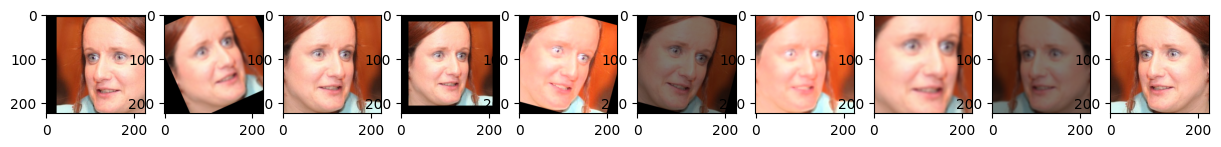

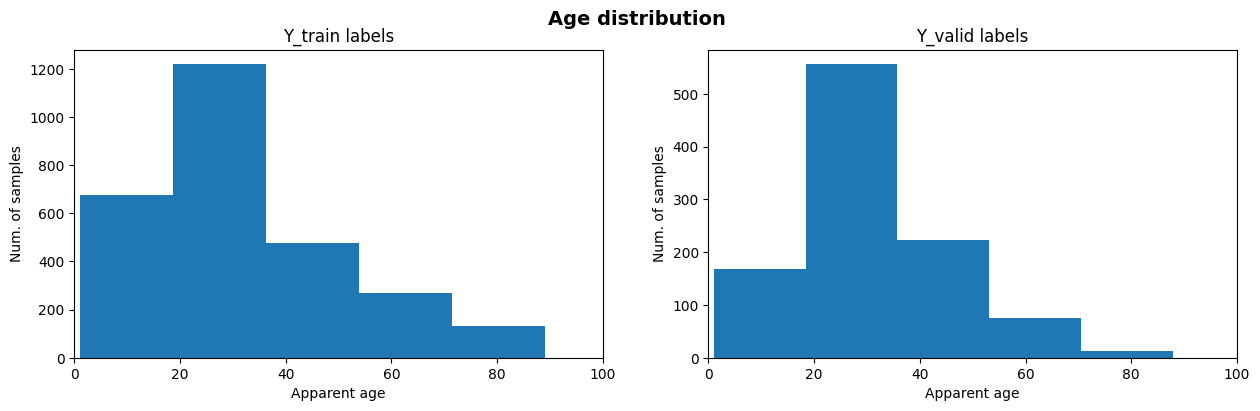

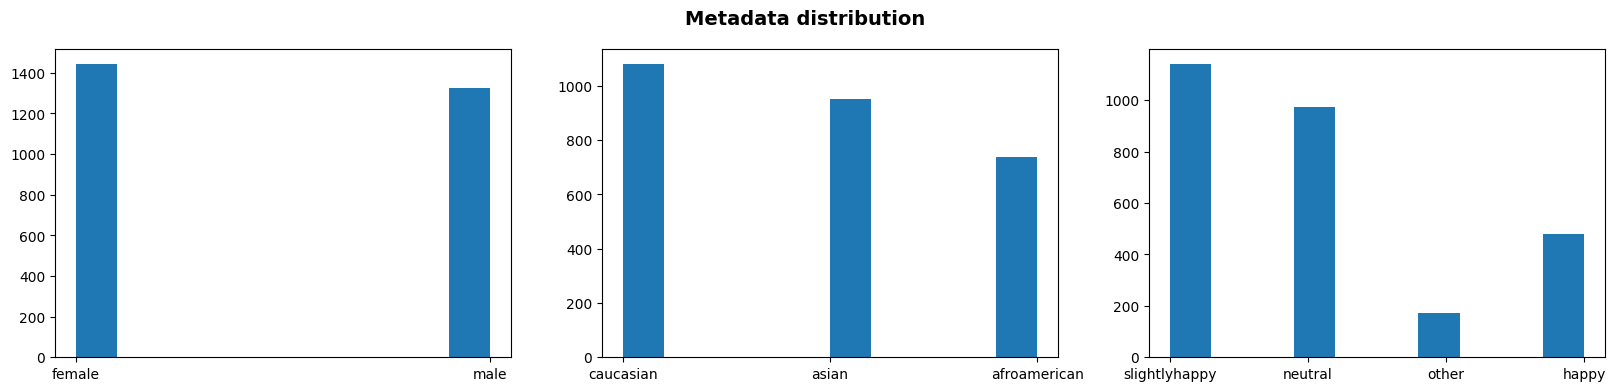

In [ ]:
# Preprocess

# Functions to transform the image

def flip(x):
    return cv2.flip(x, 1)

def gaussian_blur(x, blur=3.0):
    return cv2.GaussianBlur(x,(5,5),blur)

def sharpen(x, blur=3.0):
    r = 0.3
    x_blur = cv2.GaussianBlur(x,(5,5),blur)
    x_sharp = (r + 1) * x - r * x_blur
    x_sharp = np.maximum(x_sharp, np.zeros(x_sharp.shape))
    x_sharp = np.minimum(x_sharp, 255. * np.ones(x_sharp.shape))
    x_sharp = x_sharp.round().astype(np.uint8)
    return x_sharp

def less_brightness(x, n=0.5):
    x_brigth = cv2.cvtColor(x,cv2.COLOR_RGB2HSV)
    x_brigth[:,:,2] = x_brigth[:,:,2] * n +np.random.uniform()
    x_brigth = cv2.cvtColor(x_brigth,cv2.COLOR_HSV2RGB)
    return x_brigth

def more_brightness(x, value=70):
    hsv = cv2.cvtColor(x, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    x_mbrigth = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return x_mbrigth

def translation(x, n=30):
    rows, cols ,c= x.shape
    M = np.float32([[1, 0, np.random.randint(-n, n)], [0, 1, np.random.randint(-n, n)]])
    x_translate = cv2.warpAffine(x, M, (cols, rows))
    return x_translate

def rotate_zoom(img, zoom=1, angle=0, coord=None):
    # get the center of the opertation
    cy, cx = [ i/2 for i in img.shape[:-1] ] if coord is None else coord[::-1]
    # get matrix and apply it
    rot_mat = cv2.getRotationMatrix2D((cx,cy), angle, zoom)
    result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def rotate_right(x, a=15):
    return rotate_zoom(x, angle=a)

def rotate_left(x, a=15):
    return rotate_zoom(x, angle=-a)

def random_rotate(x, n=30):
    corners = [(75,75), (75,175), (175,75), (175,175)]
    corner = corners[np.random.randint(4)]
    angle = np.random.randint(-n, n)
    x_random_rotate = rotate_zoom(x, angle=angle, coord=corner)
    return x_random_rotate

def zoom(x, n=1.5):
    return rotate_zoom(x, n)

def away_zoom(x, n=0.85):
    return rotate_zoom(x, n)

def random_zoom(x, n=1.3):
    cor = x.shape[0]
    corners = [(60,60), (60,150), (150,60), (150,150)]
    corner = corners[np.random.randint(4)]
    return rotate_zoom(x, n, coord=corner)

def to_grayscale(x):
    x_gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    x_gr = cv2.cvtColor(x_gray, cv2.COLOR_GRAY2RGB)
    return x_gr

def color(x):
    color = np.random.randint(3)
    x_color = x.copy()
    x_color[:,:,color] = x_color[:,:,color]*.3+np.random.uniform()
    return x_color

def normalize(x):
    x = np.maximum(x, np.zeros(x.shape))
    x = np.minimum(x, 255. * np.ones(x.shape))
    x = x.round().astype(np.uint8)
    return x

def gaussian_noise(x):
    gauss = np.random.normal(30, 30, x.shape)
    x_gauss = x + gauss
    x_gauss = normalize(x_gauss)
    return x_gauss

def salt_n_peper(x):
    x_sp = x.copy()
    num_salt, num_pepper = 500, 500
    coords_x = np.random.randint(0, x.shape[0], num_salt)
    coords_y = np.random.randint(0, x.shape[1], num_salt)
    for i in range(num_salt):
        x_sp[coords_x[i],coords_y[i],:] = 255
    coords_x = np.random.randint(0, x.shape[0], num_pepper)
    coords_y = np.random.randint(0, x.shape[1], num_pepper)
    for i in range(num_pepper):
        x_sp[coords_x[i],coords_y[i],:] = 0
    return x_sp

def speckle(x):
    row,col,ch = x.shape
    gauss = np.random.randn(row,col,ch)
    gauss = gauss.reshape(row,col,ch)
    x_speckle = x + x * gauss
    x_speckle = normalize(x_speckle)
    return x_speckle

# Function to decide which transformations are to be applied to the image

def rand_transform(img):
    # roll a dice for each transformation
    x = img.copy()

    # flip or not
    if np.random.randint(2):
        x = flip(x)

    # blur or sharpen
    r = np.random.randint(3)
    if r == 0:
        x = gaussian_blur(x)
    elif r == 1:
        x = sharpen(x)
    else:
        pass

    # color modifications
    r = np.random.randint(50)
    if r < 10:
        x = less_brightness(x)
    elif r < 20:
        x = more_brightness(x)
    elif r < 25:
        x = to_grayscale(x)
    elif r < 27:
        x = color(x)
    else:
        pass

    # position modifications (rotation, zoom, translocate)
    r = np.random.randint(100)
    if r < 10:
        x = rotate_left(x)
    elif r < 20:
        x = rotate_right(x)
    elif r < 30:
        x = zoom(x)
    elif r < 40:
        x = random_zoom(x)
    elif r < 50:
        x = random_rotate(x)
    elif r < 60:
        x = away_zoom(x)
    elif r < 70:
        x = translation(x)
    else:
        pass

    # add noise
    r = np.random.randint(100)
    if r < 10:
        x = gaussian_noise(x)
    elif r < 20:
        x = salt_n_peper(x)
    elif r < 22:
        x = speckle(x)
    else:
        pass

    return x

n = 10

# Randomly selecting a random image from train set
img = X_train[np.random.randint(0, len(X_train))]

ax = tuple([] for _ in range(n))
fig, ax = plt.subplots(1, n, figsize=(15, 15))
for i in range(n):
    x = rand_transform(img)
    ax[i].imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))

y = np.logical_and(0 <= Y_train*100, Y_train*100 < 20)
m = np.logical_and(20 <= Y_train*100, Y_train*100 < 40)
a = np.logical_and(40 <= Y_train*100, Y_train*100 < 60)
s = np.logical_and(60 <= Y_train*100, Y_train*100 < 100)

print(y.sum())
print(m.sum())
print(a.sum())
print(s.sum())
print("total=", len(y))

# Naive age data Augmentation

# Considering we have: 534 young, 1683 mid age, 525 senior, 103 old
# From a total of 2845 images
# We are going to try to level that to the same amount per age group.

def naive_age_da(X_train, Y_train, M_train):
    X_new, Y_new, M_new = [], [], []
    for i in range(len(X_train)):
        if Y_train[i] < 0.20: # Young
            for j in range(3):
                X_new.append(rand_transform(X_train[i]))
                Y_new.append(Y_train[i])
                M_new.append(M_train[i])

        elif Y_train[i] < 0.40: # Mid age
            for j in range(1):
                X_new.append(rand_transform(X_train[i]))
                Y_new.append(Y_train[i])
                M_new.append(M_train[i])

        elif Y_train[i] < 0.60: # Senior
            for j in range(3):
                X_new.append(rand_transform(X_train[i]))
                Y_new.append(Y_train[i])
                M_new.append(M_train[i])

        elif Y_train[i] < 1.00: # Old
            for j in range(15):
                X_new.append(rand_transform(X_train[i]))
                Y_new.append(Y_train[i])
                M_new.append(M_train[i])
        else:
            print("someone is older than 100 lol")
    X_new, Y_new, M_new = np.array(X_new), np.array(Y_new), np.array(M_new)
    return X_new, Y_new, M_new

# Looking more into the data

def age_da(X_train, Y_train, M_train):
  def gen_n(X, Y, M, n):
    X += [rand_transform(X_train[i]) for _ in range(n)]
    Y += [Y_train[i] for _ in range(n)]
    M += [M_train[i] for _ in range(n)]
    return X, Y, M

  X_new, Y_new, M_new = [], [], []
  for i in range(len(X_train)):
    if Y_train[i] < 0.05: n = 2
    elif Y_train[i] < 0.1: n = 4
    elif Y_train[i] < 0.15: n = 5
    elif Y_train[i] < 0.2: n = 1
    elif Y_train[i] < 0.3: n = 1
    elif Y_train[i] < 0.4: n = 1
    elif Y_train[i] < 0.5: n = 2
    elif Y_train[i] < 0.6: n = 3
    elif Y_train[i] < 0.7: n = 5
    elif Y_train[i] < 1.: n = 20
    else:
      n = 1
    X_new, Y_new, M_new = gen_n(X_new, Y_new, M_new, n)


  X_new, Y_new, M_new = np.array(X_new), np.array(Y_new), np.array(M_new)
  return X_new, Y_new, M_new

# Looking more into the data

def race_age_da(X_train, Y_train, M_train):
  def gen_n(X, Y, M, n):
    X += [rand_transform(X_train[i]) for _ in range(n)]
    Y += [Y_train[i] for _ in range(n)]
    M += [M_train[i] for _ in range(n)]
    return X, Y, M

  X_new, Y_new, M_new = [], [], []
  for i in range(len(X_train)):
    # age
    if Y_train[i] < 0.05: n = 2
    elif Y_train[i] < 0.1: n = 4
    elif Y_train[i] < 0.15: n = 5
    elif Y_train[i] < 0.2: n = 1
    elif Y_train[i] < 0.3: n = 1
    elif Y_train[i] < 0.4: n = 1
    elif Y_train[i] < 0.5: n = 2
    elif Y_train[i] < 0.6: n = 3
    elif Y_train[i] < 0.7: n = 5
    elif Y_train[i] < 1.: n = 20
    else: n = 1

    # race
    if M_train[i,1] == 'caucasian': n = math.ceil(n / 5)
    elif M_train[i,1] == 'asian': n *= 3
    elif M_train[i,1] == 'afroamerican': n *= 5

    X_new, Y_new, M_new = gen_n(X_new, Y_new, M_new, n)


  X_new, Y_new, M_new = np.array(X_new), np.array(Y_new), np.array(M_new)
  return X_new, Y_new, M_new

# Looking more into the data

def split_da(X_train, Y_train, M_train):
  def gen_n(X, Y, M, n):
    X += [rand_transform(X_train[i]) for _ in range(n)]
    Y += [Y_train[i] for _ in range(n)]
    M += [M_train[i] for _ in range(n)]
    return X, Y, M

  X_new, Y_new, M_new = [], [], []
  for i in range(len(X_train)):
    # age
    if Y_train[i] < 0.05: n = 2
    elif Y_train[i] < 0.1: n = 4
    elif Y_train[i] < 0.15: n = 5
    elif Y_train[i] < 0.2: n = 1
    elif Y_train[i] < 0.3: n = 1
    elif Y_train[i] < 0.4: n = 1
    elif Y_train[i] < 0.5: n = 2
    elif Y_train[i] < 0.6: n = 3
    elif Y_train[i] < 0.7: n = 5
    elif Y_train[i] < 1.: n = 20
    else: n = 1

    # race
    if M_train[i,1] == 'caucasian': n = math.ceil(n / 2)
    elif M_train[i,1] == 'asian': n *= 2
    elif M_train[i,1] == 'afroamerican': n *= 6

    # happiness
    if M_train[i,2] == 'Other': n *= 6
    elif M_train[i,1] == 'Happy': n *= 3

    X_new, Y_new, M_new = gen_n(X_new, Y_new, M_new, n)


  X_new, Y_new, M_new = np.array(X_new), np.array(Y_new), np.array(M_new)
  return X_new, Y_new, M_new

# Function to decide which transformations are to be applied to the image

def rand_transform_extreme(img):
    # roll a dice for each transformation
    x = img.copy()

    # flip or not
    if np.random.randint(2): x = flip(x)

    # blur or sharpen
    r = np.random.randint(3)
    if r == 0: x = gaussian_blur(x, 5.0)
    elif r == 1: x = sharpen(x, 5.0)
    else: pass

    # color modifications
    r = np.random.randint(50)
    if r < 10: x = less_brightness(x, 0.3)
    elif r < 20: x = more_brightness(x, 100)
    elif r < 25: x = to_grayscale(x)
    elif r < 30: x = color(x)
    else: pass

    # position modifications (rotation, zoom, translocate)
    r = np.random.randint(100)
    if r < 10: x = rotate_left(x, 30)
    elif r < 20: x = rotate_right(x, 30)
    elif r < 30: x = zoom(x, 1.7)
    elif r < 40: x = random_zoom(x)
    elif r < 50: x = random_rotate(x)
    elif r < 60: x = away_zoom(x, 0.70)
    elif r < 70: x = translation(x, 45)
    else: pass

    # add noise
    r = np.random.randint(100)
    if r < 10: x = gaussian_noise(x)
    elif r < 20: x = salt_n_peper(x)
    elif r < 22: x = speckle(x)
    else: pass

    return x

def extreme_da(X_train, Y_train, M_train):
  def gen_n(X, Y, M, n):
    X += [rand_transform_extreme(X_train[i]) for _ in range(n)]
    Y += [Y_train[i] for _ in range(n)]
    M += [M_train[i] for _ in range(n)]
    return X, Y, M

  X_new, Y_new, M_new = [], [], []
  for i in range(len(X_train)):
    # age
    if Y_train[i] < 0.05: n = 2
    elif Y_train[i] < 0.1: n = 4
    elif Y_train[i] < 0.15: n = 5
    elif Y_train[i] < 0.2: n = 1
    elif Y_train[i] < 0.3: n = 1
    elif Y_train[i] < 0.4: n = 1
    elif Y_train[i] < 0.5: n = 2
    elif Y_train[i] < 0.6: n = 3
    elif Y_train[i] < 0.7: n = 5
    elif Y_train[i] < 1.: n = 20
    else: n = 1

    # race
    if M_train[i,1] == 'caucasian': n = math.ceil(n / 2)
    elif M_train[i,1] == 'asian': n *= 2
    elif M_train[i,1] == 'afroamerican': n *= 6

    # happiness
    if M_train[i,2] == 'Other': n *= 6
    elif M_train[i,1] == 'Happy': n *= 3

    X_new, Y_new, M_new = gen_n(X_new, Y_new, M_new, n)


  X_new, Y_new, M_new = np.array(X_new), np.array(Y_new), np.array(M_new)
  return X_new, Y_new, M_new

#X_train, Y_train, M_train = age_da(X_train, Y_train, M_train)
#X_train, Y_train, M_train = race_age_da(X_train, Y_train, M_train)
X_train, Y_train, M_train = split_da(X0, Y0, M0)
#X_train, Y_train, M_train = extreme_da(X_train, Y_train, M_train)
del X0, Y0, M0

print(X_train.shape[0])

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Age distribution', fontsize=14, fontweight='bold')

# labels are multiplied by 100 to show the original values
ax1.hist(Y_train*100, bins = 5)
ax1.set_title('Y_train labels')
ax1.set(xlabel='Apparent age', ylabel='Num. of samples')
ax1.set_xlim([0, 100])

ax2.hist(Y_valid*100, bins = 5)
ax2.set_title('Y_valid labels')
ax2.set(xlabel='Apparent age', ylabel='Num. of samples')
ax2.set_xlim([0, 100])

def show_bias(M):
    gender = []
    etnhicity = []
    emotion = []
    for sample in M:
      gender.append(sample[0])
      etnhicity.append(sample[1])
      emotion.append(sample[2])

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
    fig.suptitle('Metadata distribution', fontsize=14, fontweight='bold')

    ax1.hist(gender)
    ax2.hist(etnhicity)
    ax3.hist(emotion)

show_bias(M_train)

#=================================================================
# post-processing the train data with respect to ResNet-50 Inputs.
#=================================================================
# train set
X_train = X_train.astype('float32')
for i in range(0,X_train.shape[0]):
  x = X_train[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_train[i,] = tf.keras.applications.resnet50.preprocess_input(x)



## Model

In [ ]:
del model

In [ ]:

## Getting the model



download_model = True

if download_model:
  # downloading the ResNet50
  !wget http://data.chalearnlap.cvc.uab.cat/Colab_MFPDS/model.zip

  # decompressing the data
  from zipfile import ZipFile

  with ZipFile('model.zip','r') as zip:
    zip.extractall()
    print('Model decompressed successfully')

  # removing the .zip file after extraction  to clean space
  !rm model.zip

import h5py

# loading the pretrained model
model = tf.keras.models.load_model('./model/weights.h5')

# Building the last layers
fc_512 = model.get_layer('dim_proj').output
dp_layer = tf.keras.layers.Dropout(0.5)(fc_512)
fc_128 = tf.keras.layers.Dense(128, activation='relu', name='f_128')(dp_layer)
fc_32 = tf.keras.layers.Dense(32, activation='relu', name='f_32')(fc_128)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='predict')(fc_32)

model = tf.keras.models.Model(inputs=model.get_layer('base_input').output,outputs=output)

# Visualize model
#print(model.summary())
#tf.keras.utils.plot_model(model, show_shapes=True)

## Defining training

counter = 0
for layer in model.layers:
  if counter <= 174:
    layer.trainable = False
  else:
    layer.trainable = True
  counter +=1

--2024-03-28 16:42:52--  http://data.chalearnlap.cvc.uab.cat/Colab_MFPDS/model.zip
Resolving data.chalearnlap.cvc.uab.cat (data.chalearnlap.cvc.uab.cat)... 158.109.8.102
Connecting to data.chalearnlap.cvc.uab.cat (data.chalearnlap.cvc.uab.cat)|158.109.8.102|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107893665 (103M) [application/zip]
Saving to: ‘model.zip’

model.zip           100%[===================>] 102.89M  6.20MB/s    in 32s     

2024-03-28 16:43:25 (3.24 MB/s) - ‘model.zip’ saved [107893665/107893665]

Model decompressed successfully


## Stage 1

Epoch 1/20
87/87 [==============================] - ETA: 0s - loss: 0.3015 - mae: 0.2966

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


87/87 [==============================] - 32s 325ms/step - loss: 0.3015 - mae: 0.2966 - val_loss: 0.2788 - val_mae: 0.2846
Epoch 2/20
87/87 [==============================] - 11s 125ms/step - loss: 0.2875 - mae: 0.2815 - val_loss: 0.2717 - val_mae: 0.2772
Epoch 3/20
87/87 [==============================] - 11s 123ms/step - loss: 0.2791 - mae: 0.2731 - val_loss: 0.2706 - val_mae: 0.2757
Epoch 4/20
87/87 [==============================] - 10s 119ms/step - loss: 0.2707 - mae: 0.2645 - val_loss: 0.2723 - val_mae: 0.2784
Epoch 5/20
87/87 [==============================] - 14s 167ms/step - loss: 0.2735 - mae: 0.2678 - val_loss: 0.2683 - val_mae: 0.2711
Epoch 6/20
87/87 [==============================] - 13s 148ms/step - loss: 0.2707 - mae: 0.2655 - val_loss: 0.2717 - val_mae: 0.2794
Epoch 7/20
87/87 [==============================] - 13s 148ms/step - loss: 0.2688 - mae: 0.2633 - val_loss: 0.2690 - val_mae: 0.2742
Epoch 8/20
87/87 [==============================] - 13s 149ms/step - loss: 0.267

<ipython-input-20-7be00370b941>:87: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_st1_valid[i]*100, Y_valid[i]*100))


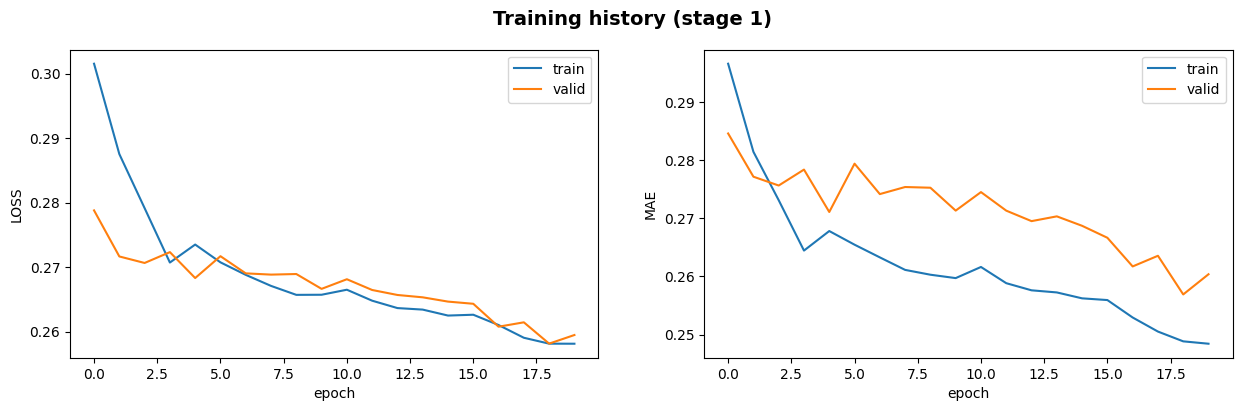

In [ ]:

# load a model and train history
#--------------------------
LOAD_BEST_MODEL_ST1 = False # (training only the last FC layers)
#--------------------------

import pickle

if(LOAD_BEST_MODEL_ST1==True):
  # downloading the trained model
  !wget http://data.chalearnlap.cvc.uab.cat/Colab_MFPDS/2024/best_model_st1.zip
  # decompressing the data
  with ZipFile('best_model_st1.zip','r') as zip:
    zip.extractall()
    print('Model decompressed successfully')
  # removing the .zip file afte
import pickle

if(LOAD_BEST_MODEL_ST1==True):
  # downloading the trained model
  !wget http://data.chalearnlap.cvc.uab.cat/Colab_MFPDS/2024/best_model_st1.zip
  # decompressing the data
  with ZipFile('best_model_st1.zip','r') as zip:
    zip.extractall()
    print('Model decompressed successfully')
  # removing the .zip file after extraction  to clean space
  !rm best_model_st1.zip
else:
  # defining the early stop criteria
  es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
  # saving the best model based on val_loss
  mc = tf.keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/temp/best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

  # defining the optimizer
  model.compile(tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError(),metrics=['mae'])

  # training the model
  history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=20, shuffle=True, verbose=1, callbacks=[es,mc])

  # saving training history (for future visualization)
  with open('/content/gdrive/MyDrive/temp/train_history.pkl', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

from matplotlib import pyplot as plt

# here, it loads the history of the model we have already trained, or loads the
# history of the model you defined and trained
if(LOAD_BEST_MODEL_ST1==True):
  train_hist = pickle.load(open("train_history_closs.pkl","rb"))
else:
  train_hist = pickle.load(open("/content/gdrive/MyDrive/temp/train_history.pkl","rb"))

# we plot both, the LOSS and MAE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Training history (stage 1)', fontsize=14, fontweight='bold')

ax1.plot(train_hist['loss'])
ax1.plot(train_hist['val_loss'])
ax1.set(xlabel='epoch', ylabel='LOSS')
ax1.legend(['train', 'valid'], loc='upper right')

ax2.plot(train_hist['mae'])
ax2.plot(train_hist['val_mae'])
ax2.set(xlabel='epoch', ylabel='MAE')
ax2.legend(['train', 'valid'], loc='upper right')


### Eval 1st stage

# loading the saved model
if(LOAD_BEST_MODEL_ST1==True):
  model = tf.keras.models.load_model('best_model_closs.h5')
else:
  model = tf.keras.models.load_model('/content/gdrive/MyDrive/temp/best_model.h5')

# predict on the validation data (normalized outputs)
predictions_st1_valid = model.predict(X_valid, batch_size=32, verbose=1)

# evaluating on VALIDATION data (re-scalling predictions to the range of "ages", using the normalization factor)
error = []
for i in range(0,len(Y_valid)):
  error.append(abs(np.subtract(predictions_st1_valid[i][0]*100,Y_valid[i]*100)))
print('MAE (model stage 1, validation set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_st1_valid[i]*100, Y_valid[i]*100))

## Stage 2

Epoch 1/30
173/173 [==============================] - ETA: 0s - loss: 0.2599 - mae: 0.2460

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


173/173 [==============================] - 67s 219ms/step - loss: 0.2599 - mae: 0.2460 - val_loss: 0.2578 - val_mae: 0.2554
Epoch 2/30
173/173 [==============================] - 43s 246ms/step - loss: 0.2530 - mae: 0.2370 - val_loss: 0.2578 - val_mae: 0.2549
Epoch 3/30
173/173 [==============================] - 43s 251ms/step - loss: 0.2503 - mae: 0.2334 - val_loss: 0.2543 - val_mae: 0.2496
Epoch 4/30
173/173 [==============================] - 41s 235ms/step - loss: 0.2434 - mae: 0.2197 - val_loss: 0.2456 - val_mae: 0.2324
Epoch 5/30
173/173 [==============================] - 45s 257ms/step - loss: 0.2332 - mae: 0.1999 - val_loss: 0.2331 - val_mae: 0.2037
Epoch 6/30
173/173 [==============================] - 44s 254ms/step - loss: 0.2236 - mae: 0.1807 - val_loss: 0.2298 - val_mae: 0.1964
Epoch 7/30
173/173 [==============================] - 45s 262ms/step - loss: 0.2154 - mae: 0.1613 - val_loss: 0.2214 - val_mae: 0.1765
Epoch 8/30
173/173 [==============================] - 51s 293ms/st

<ipython-input-23-434ece9ebefb>:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_st2_valid[i]*100, Y_valid[i]*100))


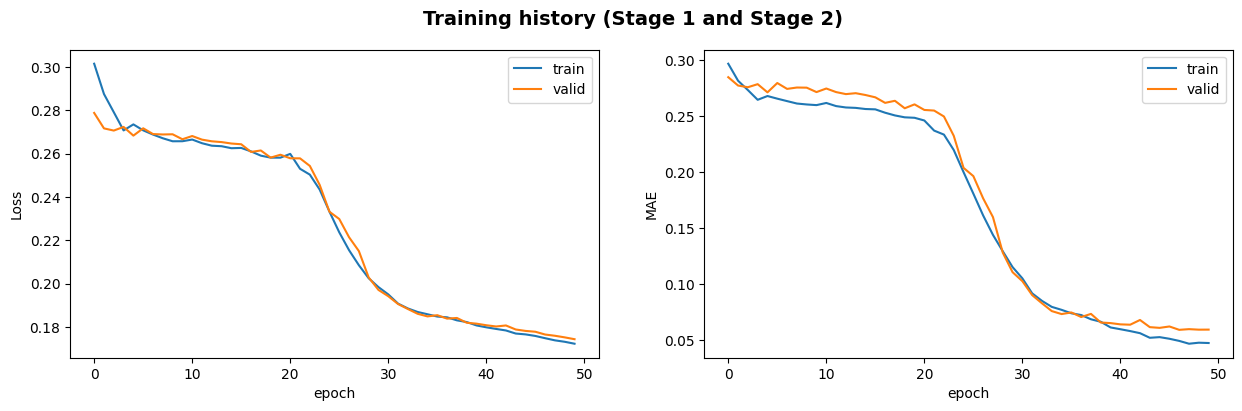

In [ ]:
## 2nd stage

# setting all layers of the model to trainable
model.trainable = True

counter = 0
for layer in model.layers:
  counter +=1

# Loding a pretrained model or train
#--------------------------
LOAD_BEST_MODEL_ST2 = False
#--------------------------

if(LOAD_BEST_MODEL_ST2==True):
  # downloading the trained model
  !wget http://data.chalearnlap.cvc.uab.cat/Colab_MFPDS/2024/best_model_st2.zip
  # decompressing the data
  with ZipFile('best_model_st2.zip','r') as zip:
    zip.extractall()
    print('Model decompressed successfully')
  # removing the .zip file after extraction  to clean space
  !rm best_model_st2.zip

else:

  # training all layers (2nd stage), given the model saved on stage 1
  model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError(),metrics=['mae'])

  # defining the early stop criteria
  es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
  # saving the best model (2nd stage) based on val_loss with a different name
  mc = tf.keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/temp/best_model_2nd_stage.h5', monitor='val_loss', mode='min', save_best_only=True)

  history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=16, epochs=30, shuffle=True, verbose=1, callbacks=[es,mc])



  # saving training history
  with open('/content/gdrive/MyDrive/temp/train_history_2nd_stage.pkl', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

if(LOAD_BEST_MODEL_ST1==True and LOAD_BEST_MODEL_ST2==True):
  train_hist = pickle.load(open("train_history_closs.pkl","rb"))
  train_hist_2nd = pickle.load(open("train_history_2nd_stage_closs.pkl","rb"))
else:
  train_hist = pickle.load(open("/content/gdrive/MyDrive/temp/train_history.pkl","rb"))
  train_hist_2nd = pickle.load(open("/content/gdrive/MyDrive/temp/train_history_2nd_stage.pkl","rb"))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Training history (Stage 1 and Stage 2)', fontsize=14, fontweight='bold')

ax1.plot(train_hist['loss']+train_hist_2nd['loss'])
ax1.plot(train_hist['val_loss']+train_hist_2nd['val_loss'])
ax1.set(xlabel='epoch', ylabel='Loss')
ax1.legend(['train', 'valid'], loc='upper right')

ax2.plot(train_hist['mae']+train_hist_2nd['mae'])
ax2.plot(train_hist['val_mae']+train_hist_2nd['val_mae'])
ax2.set(xlabel='epoch', ylabel='MAE')
ax2.legend(['train', 'valid'], loc='upper right')

### Eval 2nd stage

# loading the saved model
if(LOAD_BEST_MODEL_ST2 == True):
  model_st2 = tf.keras.models.load_model('best_model_2nd_stage.h5')
else:
  model_st2 = tf.keras.models.load_model('/content/gdrive/MyDrive/temp/best_model_2nd_stage.h5')

# predict on the validation data
predictions_st2_valid = model_st2.predict(X_valid, batch_size=32, verbose=1)

# evaluating on validation data (and re-scalling the predictions to the range of "ages")
error = []
for i in range(0,len(Y_valid)):
  error.append(abs(np.subtract(predictions_st2_valid[i][0]*100,Y_valid[i]*100)))

print('MAE (model stage 2, validation set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_st2_valid[i]*100, Y_valid[i]*100))

In [ ]:
del X_train, Y_train, M_train

### Test

In [ ]:
# loading the test data (with labels)
X_test = np.load('./data/data_test.npy')
Y_test = np.load('./data/labels_test.npy')

#=================================================================
# post-processing the test data with respect to ResNet-50 Inputs.
#=================================================================
# test set
X_test = X_test.astype('float32')
for i in range(0,X_test.shape[0]):
  x = X_test[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_test[i,] = tf.keras.applications.resnet50.preprocess_input(x)

print('----')
print('Test data size and shape', X_test.shape)
print('Test labels size and shape', Y_test.shape)

----
Test data size and shape (1978, 224, 224, 3)
Test labels size and shape (1978,)


In [ ]:
predictions_st2_test = model_st2.predict(X_test, batch_size=32, verbose=1)*100

62/62 [==============================] - 11s 105ms/step


In [ ]:
# evaluating on test data
# note, the Y_test labels were not normalized, so they don't need to be re-scaled back
error = []
for i in range(0,len(Y_test)):
  error.append(abs(np.subtract(predictions_st2_test[i][0],Y_test[i])))

print('MAE (model stage 2, TEST set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_st2_test[i], Y_test[i]))

MAE (model stage 2, TEST set) = 6.61088733
-----
predicted age = 34.749 - Ground truth = 23.205
predicted age = 56.075 - Ground truth = 70.737
predicted age = 45.659 - Ground truth = 55.368
predicted age = 30.114 - Ground truth = 24.278
predicted age = 34.119 - Ground truth = 25.231
predicted age = 42.229 - Ground truth = 35.179
predicted age = 44.226 - Ground truth = 26.923
predicted age = 43.926 - Ground truth = 48.189
predicted age = 28.996 - Ground truth = 18.676
predicted age = 51.071 - Ground truth = 57.378


<ipython-input-24-f4f6527d7df3>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions_st2_test[i], Y_test[i]))


## Stage 3

In [ ]:
model_st2 = tf.keras.models.load_model('/content/gdrive/MyDrive/temp/best_model_2nd_stage.h5')

In [ ]:
model = model_st2
del model_st2

In [ ]:
del X_test, Y_test

In [ ]:
#=================================================================
# post-processing the train data with respect to ResNet-50 Inputs.
#=================================================================
# train set
X_train = X_train.astype('float32')
for i in range(0,X_train.shape[0]):
  x = X_train[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_train[i,] = tf.keras.applications.resnet50.preprocess_input(x)



In [ ]:
model.trainable = True

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError(),metrics=['mae'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = tf.keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/temp/best_model_3rd_stage_closs.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=16, epochs=10, shuffle=True, verbose=1, callbacks=[es,mc])


Epoch 1/10
173/173 [==============================] - ETA: 0s - loss: 0.1721 - mae: 0.0536

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


173/173 [==============================] - 86s 269ms/step - loss: 0.1721 - mae: 0.0536 - val_loss: 0.1725 - val_mae: 0.0621
Epoch 2/10
173/173 [==============================] - 47s 269ms/step - loss: 0.1695 - mae: 0.0522 - val_loss: 0.1709 - val_mae: 0.0638
Epoch 3/10
173/173 [==============================] - 46s 265ms/step - loss: 0.1661 - mae: 0.0456 - val_loss: 0.1676 - val_mae: 0.0574
Epoch 4/10
173/173 [==============================] - 46s 265ms/step - loss: 0.1646 - mae: 0.0465 - val_loss: 0.1659 - val_mae: 0.0589
Epoch 5/10
173/173 [==============================] - 46s 268ms/step - loss: 0.1624 - mae: 0.0447 - val_loss: 0.1644 - val_mae: 0.0590
Epoch 6/10
173/173 [==============================] - 43s 249ms/step - loss: 0.1611 - mae: 0.0446 - val_loss: 0.1622 - val_mae: 0.0562
Epoch 7/10
173/173 [==============================] - 46s 267ms/step - loss: 0.1588 - mae: 0.0402 - val_loss: 0.1617 - val_mae: 0.0605
Epoch 8/10
173/173 [==============================] - 43s 251ms/st

In [ ]:
with open('/content/gdrive/MyDrive/temp/train_history_3rd_stage_closs.pkl', 'wb') as handle:
    pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

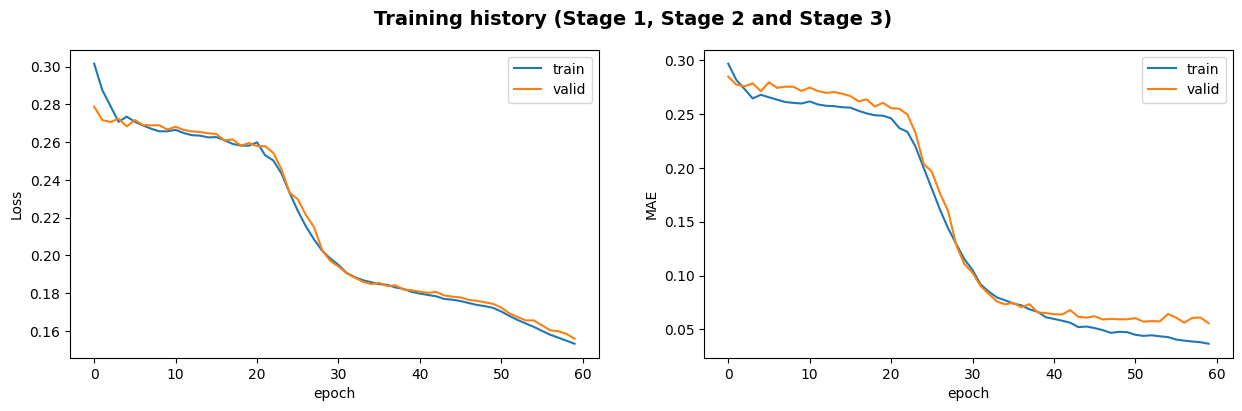

In [ ]:

train_hist = pickle.load(open("/content/gdrive/MyDrive/temp/train_history.pkl","rb"))
train_hist_2nd = pickle.load(open("/content/gdrive/MyDrive/temp/train_history_2nd_stage.pkl","rb"))
history = pickle.load(open("/content/gdrive/MyDrive/temp/train_history_3rd_stage.pkl","rb"))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
fig.suptitle('Training history (Stage 1, Stage 2 and Stage 3)', fontsize=14, fontweight='bold')

ax1.plot(train_hist['loss']+train_hist_2nd['loss']+history['loss'])
ax1.plot(train_hist['val_loss']+train_hist_2nd['val_loss']+history['val_loss'])
ax1.set(xlabel='epoch', ylabel='Loss')
ax1.legend(['train', 'valid'], loc='upper right')

ax2.plot(train_hist['mae']+train_hist_2nd['mae']+history['mae'])
ax2.plot(train_hist['val_mae']+train_hist_2nd['val_mae']+history['val_mae'])
ax2.set(xlabel='epoch', ylabel='MAE')
ax2.legend(['train', 'valid'], loc='upper right')

In [ ]:
predictions = model.predict(X_valid, batch_size=32, verbose=1)

# evaluating on validation data (and re-scalling the predictions to the range of "ages")
error = []
for i in range(0,len(Y_valid)):
  error.append(abs(np.subtract(predictions[i][0]*100,Y_valid[i]*100)))

print('MAE (model stage 2, validation set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions[i]*100, Y_valid[i]*100))

33/33 [==============================] - 6s 77ms/step
MAE (model stage 2, validation set) = 5.75939848
-----
predicted age = 23.723 - Ground truth = 24.267
predicted age = 27.273 - Ground truth = 34.125
predicted age = 25.517 - Ground truth = 30.286
predicted age = 25.083 - Ground truth = 26.231
predicted age = 50.927 - Ground truth = 53.385
predicted age = 42.085 - Ground truth = 45.957
predicted age = 22.193 - Ground truth = 23.733
predicted age = 26.359 - Ground truth = 32.074
predicted age = 61.975 - Ground truth = 79.538
predicted age = 23.270 - Ground truth = 18.632


<ipython-input-23-c91ea3378a52>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions[i]*100, Y_valid[i]*100))


In [ ]:
del X_train, X_valid, Y_train, Y_valid, M_train

In [ ]:
X_test = np.load('./data/data_test.npy')
Y_test = np.load('./data/labels_test.npy')

X_test = X_test.astype('float32')
for i in range(0,X_test.shape[0]):
  x = X_test[i,:,:,:]
  x = np.expand_dims(x, axis=0)
  X_test[i,] = tf.keras.applications.resnet50.preprocess_input(x)

In [ ]:
predictions = model.predict(X_test, batch_size=32, verbose=1)*100

62/62 [==============================] - 8s 116ms/step


In [ ]:
# evaluating on test data
# note, the Y_test labels were not normalized, so they don't need to be re-scaled back
error = []
for i in range(0,len(Y_test)):
  error.append(abs(np.subtract(predictions[i][0],Y_test[i])))

print('MAE (model stage 2, TEST set) = %.8f' %(np.mean(error)))

# printing some predictions
print('-----')
for i in range(0,10):
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions[i], Y_test[i]))

MAE (model stage 2, TEST set) = 5.09175343
-----
predicted age = 21.458 - Ground truth = 23.205
predicted age = 56.438 - Ground truth = 70.737
predicted age = 37.284 - Ground truth = 55.368
predicted age = 23.798 - Ground truth = 24.278
predicted age = 30.565 - Ground truth = 25.231
predicted age = 29.414 - Ground truth = 35.179
predicted age = 35.128 - Ground truth = 26.923
predicted age = 39.281 - Ground truth = 48.189
predicted age = 21.046 - Ground truth = 18.676
predicted age = 46.674 - Ground truth = 57.378


<ipython-input-26-3ea638358974>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted age = %.3f - Ground truth = %.3f' %(predictions[i], Y_test[i]))


In [ ]:
import csv

# saving the predictions as a csv file
with open('predictions.csv', 'w') as csvFile:
  writer = csv.writer(csvFile)
  writer.writerows(predictions)
csvFile.close()

# compressing the csv file (to be submitted to codalab as prediction)
! zip predictions_3stages_3closs.zip predictions.csv

  adding: predictions.csv (deflated 55%)
